In [1]:
import bambi as bmb
import numpy as np
import pandas as pd
import pymc as pm

In [2]:
data = pd.read_csv("tests/data/gasoline.csv")

In [3]:
data["batch"] = pd.Categorical(data["batch"], [10, 1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)
model = bmb.Model("yield ~ temp + batch", data, family="beta")
idata = model.fit(tune=100, draws=100, target_accept=0.90)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [yield_kappa, Intercept, temp, batch]


Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 24 seconds.


In [4]:
model.predict(idata, kind="mean")

In [6]:
model.predict(idata, kind="pps")

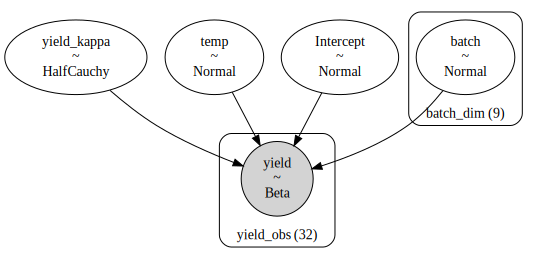

In [7]:
model.graph()